In [2]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 定义目标目录
target_dir = 'history'

# 定义文件名的通配符模式
his_solfiles = sorted(glob.glob(os.path.join('history', "History_Personal_Solution*")), 
                   key=lambda x: int(''.join(filter(str.isdigit, x))))

In [4]:
import re

df_sol = pd.DataFrame()  # 创建空的DataFrame

def extract_data(data_text):
    data_text =  data_text.replace("[", "").replace("]","").replace(",", " ")
    data_list = [float(item) for item in data_text.split()]
    return data_list

for file_item in his_solfiles:

    # 使用正则表达式提取整数部分
    integer_part = re.search(r'\d+', file_item).group()

    # 将提取到的字符串转换为整数
    integer_value = int(integer_part)

    data = []
    with open(file_item, 'r') as f:
        for readline in f:
            float_vector = extract_data(readline)
            data.append(float_vector)

        # 创建临时DataFrame，并为每列指定列名
        temp_df = pd.DataFrame(data, columns=['D', 'aa', 'cc', 'mm'])
        # 添加ID列
        temp_df['ID'] = integer_value
        temp_df['Interation'] = range(100)
        # 将临时DataFrame添加到主DataFrame中
        df_sol = pd.concat([df_sol, temp_df], ignore_index=True)

In [5]:
# 定义文件名的通配符模式
his_disfiles = sorted(glob.glob(os.path.join('history', "History_Personal_Distance*")), 
                   key=lambda x: int(''.join(filter(str.isdigit, x))))

In [6]:
import re

df_dis = pd.DataFrame()  # 创建空的DataFrame

def extract_one(data_text):
    data = float(data_text)
    return data

for file_item in his_disfiles:

    # 使用正则表达式提取整数部分
    integer_part = re.search(r'\d+', file_item).group()

    # 将提取到的字符串转换为整数
    integer_value = int(integer_part)

    data = []
    with open(file_item, 'r') as f:
        for readline in f:
            float_vector = extract_one(readline)
            data.append(float_vector)

        # 创建临时DataFrame，并为每列指定列名
        temp_df = pd.DataFrame(data, columns=['Dis'])
        # 将临时DataFrame添加到主DataFrame中
        df_dis = pd.concat([df_dis, temp_df], ignore_index=True)

In [7]:
df_all = pd.concat([df_sol, df_dis], axis=1)

In [8]:
# 对 Interation 列进行分组，然后找到每个组中 Dis 最大值的索引
idx = df_all.groupby('Interation')['Dis'].idxmax()

# 使用这些索引从原始数据框中提取相应的行
max_dis_df = df_all.loc[idx]

In [9]:
max_dis_df.head()

,D,aa,cc,mm,ID,Interation,Dis
2200,5.2348,0.4301,0.7974,3.3962,22,0,0.7639
2201,5.2352,0.4306,0.7979,3.3958,22,1,0.7624
2202,5.2356,0.4311,0.7984,3.3954,22,2,0.7614
2203,5.2360,0.4316,0.7989,3.3950,22,3,0.7604
2204,5.2364,0.4321,0.7994,3.3946,22,4,0.7594


In [10]:
# 对 Interation 列进行分组，然后按 Dis 列进行降序排序
grouped = df_all.groupby('Interation', group_keys=False).apply(lambda x: x.nlargest(5, 'Dis'))

# 提取每个分组中第二和第三大的 Dis 值对应的行
first_largest = grouped.groupby('Interation').nth(0)
second_largest = grouped.groupby('Interation').nth(1)
third_largest = grouped.groupby('Interation').nth(2)
forth_largest = grouped.groupby('Interation').nth(3)
fifth_largest = grouped.groupby('Interation').nth(4)

# 对 Interation 列进行分组，然后按 Dis 列进行降序排序
small_grouped = df_all.groupby('Interation', group_keys=False).apply(lambda x: x.nsmallest(5, 'Dis'))

# 提取每个分组中第二和第三大的 Dis 值对应的行
first_smallest = small_grouped.groupby('Interation').nth(0)
second_smallest = small_grouped.groupby('Interation').nth(1)
third_smallest = small_grouped.groupby('Interation').nth(2)
forth_smallest = small_grouped.groupby('Interation').nth(3)
fifth_smallest = small_grouped.groupby('Interation').nth(4)

In [11]:
first_largest.head()

,D,aa,cc,mm,ID,Dis
Interation,,,,,,
0,5.2348,0.4301,0.7974,3.3962,22,0.7639
1,5.2352,0.4306,0.7979,3.3958,22,0.7624
2,5.2356,0.4311,0.7984,3.3954,22,0.7614
3,5.2360,0.4316,0.7989,3.3950,22,0.7604
4,5.2364,0.4321,0.7994,3.3946,22,0.7594


In [12]:
first_smallest.head()

,D,aa,cc,mm,ID,Dis
Interation,,,,,,
0,5.4959,0.4291,0.7980,3.8994,38,0.0000
1,5.4959,0.4290,0.7977,3.8993,38,0.0000
2,5.4959,0.4289,0.7974,3.8992,38,0.0005
3,5.4959,0.4290,0.7979,3.8992,38,0.0001
4,5.4959,0.4291,0.7980,3.8994,38,0.0005


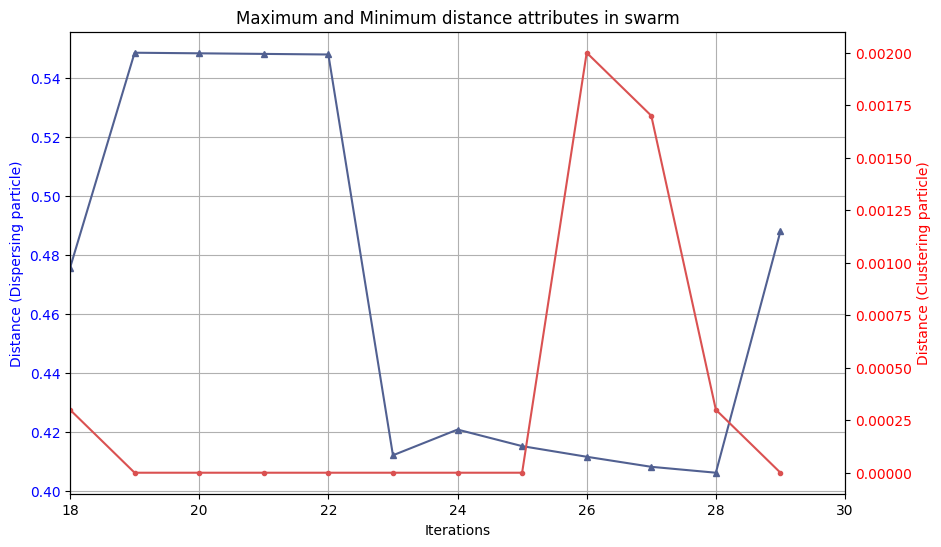

In [13]:
import matplotlib.pyplot as plt

# 示例数据（使用自己的数据替换）
# first_largest = ...
# first_smallest = ...

# 创建图形和第一个 y 轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制蓝色曲线
ax1.plot(first_largest.index[18:30], first_largest['Dis'][18:30], marker='^', markersize=5, linestyle='-', color='#516091')
#ax1.plot(second_largest.index, second_largest['Dis'], marker='^', markersize=5, linestyle='-', color='#74bec1')
#ax1.plot(third_largest.index, third_largest['Dis'], marker='^', markersize=5, linestyle='-', color='#585ee2')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Distance (Dispersing particle)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个 y 轴
ax2 = ax1.twinx()
ax2.plot(first_smallest.index[18:30], first_smallest['Dis'][18:30], marker='o', markersize=3, linestyle='-', color='#da5151')
#ax2.plot(second_smallest.index, second_smallest['Dis'], marker='o', markersize=3, linestyle='-', color='#ed9f66')
#ax2.plot(third_smallest.index, third_smallest['Dis'], marker='o', markersize=3, linestyle='-', color='#b24968')
ax2.set_ylabel('Distance (Clustering particle)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 设置标题和网格
plt.title('Maximum and Minimum distance attributes in swarm')
ax1.grid(True)

plt.xlim(18, 30)

# 显示图形
plt.show()


In [14]:
df_22 = df_all[df_all['ID'] == 22]
df_38 = df_all[df_all['ID'] == 35]

C:\Users\LongWei\AppData\Local\Temp\ipykernel_4028\1899684337.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.plot(df_22.Interation[5:17], df_22['Dis'][5:17], marker='^', markersize=5, linestyle='-', color='#516091')
C:\Users\LongWei\AppData\Local\Temp\ipykernel_4028\1899684337.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax2.plot(df_38.Interation[5:17], df_38['Dis'][5:17], marker='o', markersize=3, linestyle='-', color='#da5151')


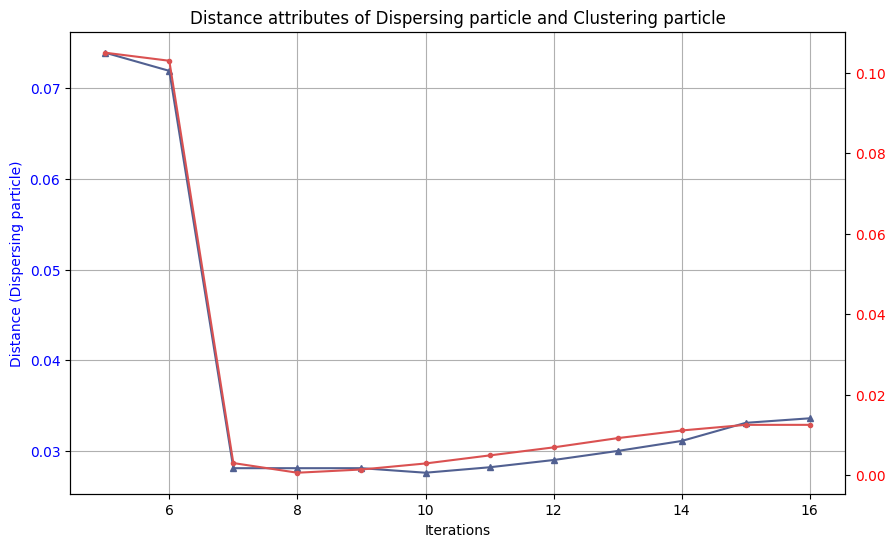

In [15]:
import matplotlib.pyplot as plt

# 示例数据（使用自己的数据替换）
# first_largest = ...
# first_smallest = ...

# 创建图形和第一个 y 轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制蓝色曲线
ax1.plot(df_22.Interation[5:17], df_22['Dis'][5:17], marker='^', markersize=5, linestyle='-', color='#516091')
#ax1.plot(second_largest.index, second_largest['Dis'], marker='^', markersize=5, linestyle='-', color='#74bec1')
#ax1.plot(third_largest.index, third_largest['Dis'], marker='^', markersize=5, linestyle='-', color='#585ee2')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Distance (Dispersing particle)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个 y 轴
ax2 = ax1.twinx()
ax2.plot(df_38.Interation[5:17], df_38['Dis'][5:17], marker='o', markersize=3, linestyle='-', color='#da5151')
#ax2.plot(second_smallest.index, second_smallest['Dis'], marker='o', markersize=3, linestyle='-', color='#ed9f66')
#ax2.plot(third_smallest.index, third_smallest['Dis'], marker='o', markersize=3, linestyle='-', color='#b24968')
#ax2.set_ylabel('Distance (Clustering particle)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 设置标题和网格
plt.title('Distance attributes of Dispersing particle and Clustering particle')
ax1.grid(True)

# 显示图形
plt.show()

In [16]:
df_dis.head()

,Dis
0,0.1671
1,0.1666
2,0.1666
3,0.1666
4,0.1666


In [17]:
df_sol.head()

,D,aa,cc,mm,ID,Interation
0,5.4661,0.4383,0.8053,3.7456,0,0
1,5.4671,0.4373,0.8043,3.7466,0,1
2,5.4681,0.4363,0.8033,3.7476,0,2
3,5.4691,0.4353,0.8023,3.7486,0,3
4,5.4701,0.4343,0.8013,3.7496,0,4


In [18]:
df_sol.head(50)

,D,aa,cc,mm,ID,Interation
0,5.4661,0.4383,0.8053,3.7456,0,0
1,5.4671,0.4373,0.8043,3.7466,0,1
2,5.4681,0.4363,0.8033,3.7476,0,2
3,5.4691,0.4353,0.8023,3.7486,0,3
4,5.4701,0.4343,0.8013,3.7496,0,4
5,5.5092,0.4266,0.8012,3.9936,0,5
6,5.5094,0.4262,0.8015,3.9940,0,6
7,5.5093,0.4264,0.8012,3.9940,0,7
8,5.5083,0.4266,0.8002,3.9950,0,8
9,5.5073,0.4256,0.7992,3.9960,0,9


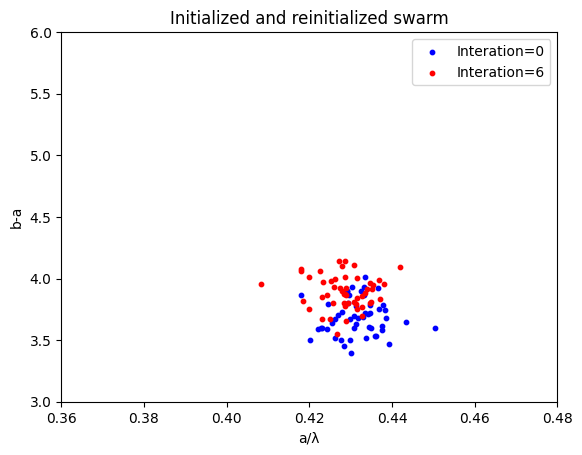

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载 DataFrame
# 假设数据保存在名为 df 的 DataFrame 中
# 如果你的数据保存在 CSV 文件中，可以使用 pd.read_csv('filename.csv') 来加载数据
# 如果数据已经在你的环境中，你可以直接加载 DataFrame

# 条件筛选，获取 'ID' 为 0 的数据子集
data_subset = df_sol[df_sol['Interation'] == 0]

# 提取 'ID' 为 0 的数据子集中的 x 和 y 列数据
x_values = data_subset['aa']
y_values = data_subset['mm']

# 绘制散点图
plt.scatter(x_values, y_values, label='Interation=0', s=10, color='blue')

# 条件筛选，获取 'ID' 为 0 的数据子集
data_subset = df_sol[df_sol['Interation'] == 6]
# 提取 'ID' 为 0 的数据子集中的 x 和 y 列数据
x_values = data_subset['aa']
y_values = data_subset['mm']
# 绘制散点图
plt.scatter(x_values, y_values, label='Interation=6', s=10, color='red')

# 添加标题和标签
plt.title('Initialized and reinitialized swarm')
plt.xlabel('a/λ')
plt.ylabel('b-a')

# 设置x轴和y轴的范围
plt.xlim(0.36, 0.48)
plt.ylim(3, 6)

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [20]:
data_subset.shape

(51, 6)

In [21]:
data_subset.head(100)

,D,aa,cc,mm,ID,Interation
6,5.5094,0.4262,0.8015,3.9940,0,6
106,5.3522,0.4346,0.7879,3.9625,1,6
206,5.3014,0.4199,0.8070,3.7544,2,6
306,5.3243,0.4243,0.7981,3.8699,3,6
406,5.4508,0.4351,0.7884,3.9140,4,6
506,5.2344,0.4381,0.8070,3.9569,5,6
606,5.3323,0.4286,0.7978,3.7739,6,6
706,5.3220,0.4181,0.8041,4.0752,7,6
806,5.2452,0.4353,0.7824,3.9459,8,6
906,5.5344,0.4260,0.8137,3.9293,9,6


In [22]:
df_sol.head

<bound method NDFrame.head of            D      aa      cc      mm  ID  Interation
0     5.4661  0.4383  0.8053  3.7456   0           0
1     5.4671  0.4373  0.8043  3.7466   0           1
2     5.4681  0.4363  0.8033  3.7476   0           2
3     5.4691  0.4353  0.8023  3.7486   0           3
4     5.4701  0.4343  0.8013  3.7496   0           4
...      ...     ...     ...     ...  ..         ...
5095  5.9995  0.4122  0.7719  4.4621  50          95
5096  5.9995  0.4122  0.7719  4.4621  50          96
5097  5.9995  0.4122  0.7719  4.4621  50          97
5098  5.9995  0.4122  0.7719  4.4621  50          98
5099  5.9995  0.4122  0.7719  4.4621  50          99

[5100 rows x 6 columns]>

In [23]:
# 定义目标目录
target_dir = 'history'

# 定义文件名的通配符模式
his_gbfit = os.path.join(target_dir, "History_Group_Solution.txt")

In [24]:
def extract_data(data_text):
    data_text =  data_text.replace("[", "").replace("]","")
    data_list = [float(item) for item in data_text.split()]
    return data_list
data = []
with open(his_gbfit, 'r') as f:
    for readline in f:
        float_vector = extract_data(readline)
        data.append(float_vector)

In [25]:
data.insert(0,[5.4683,0.4331,0.8055,3.6837])

In [26]:
df = pd.DataFrame(data, columns=['D', 'aa', 'cc', 'mm'])

In [27]:
df.shape

(101, 4)

In [28]:
df.head()

,D,aa,cc,mm
0,5.4683,0.4331,0.8055,3.6837
1,5.4959,0.4291,0.7980,3.8994
2,5.4959,0.4290,0.7977,3.8993
3,5.4959,0.4290,0.7977,3.8993
4,5.4959,0.4290,0.7977,3.8993


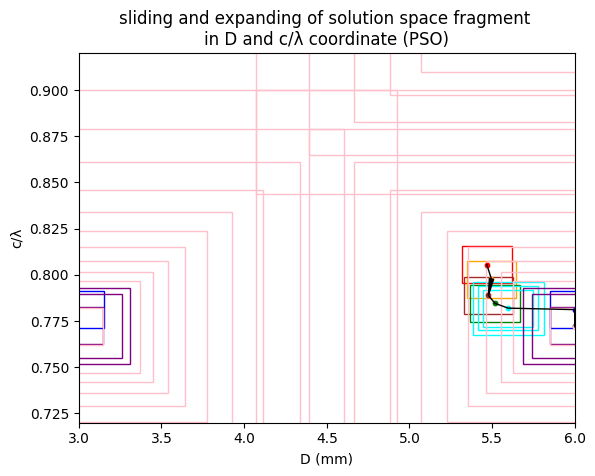

In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

# 创建一个空白图形
fig, ax = plt.subplots()

# 定义矩形的长和宽
width = 0.3
height = 0.02

# 使用内置的颜色映射
colors = plt.cm.tab20

init_num = [0, 5, 17, 23, 29, 39, 47, 55]
#init_num = [47]
# 使用不同的颜色
colors = ['red', 'orange', 'brown','green', 'cyan', 'blue', 'purple','pink']
#colors = ['purple']

for num_item,color in zip(init_num,colors):
        
    # 创建矩形对象
    rect0 = Rectangle((df.loc[num_item, 'D'] - width/2, df.loc[num_item, 'cc'] - height/2), width, height, fill=False, edgecolor=color)
    # 添加矩形到图形中
    ax.add_patch(rect0)

    if (df.loc[num_item, 'D'] - width/2) < 3:
        # 创建矩形对象
        rect01 = Rectangle((df.loc[num_item, 'D'] - width/2 + (6-3), df.loc[num_item, 'cc'] - height/2), width, height, fill=False, edgecolor=color)
        ax.add_patch(rect01)
    if (df.loc[num_item, 'D'] + width/2) > 6:
        # 创建矩形对象
        rect02 = Rectangle((df.loc[num_item, 'D'] - width/2 - (6-3), df.loc[num_item, 'cc'] - height/2), width, height, fill=False, edgecolor=color)
        ax.add_patch(rect02)
    if (df.loc[num_item, 'cc'] - height/2) < 0.72:
        # 创建矩形对象
        rect03 = Rectangle((df.loc[num_item, 'D'] - width/2, df.loc[num_item, 'cc'] - height/2 + (0.92 - 0.72)), width, height, fill=False, edgecolor=color)
        ax.add_patch(rect03)
    if (df.loc[num_item, 'cc'] + height/2) > 0.92:
        # 创建矩形对象
        rect04 = Rectangle((df.loc[num_item, 'D'] - width/2, df.loc[num_item, 'cc'] - height/2 - (0.92-0.72)), width, height, fill=False, edgecolor=color)
        ax.add_patch(rect04)

init_num = [29, 47]
colors = ['cyan', 'purple']
#init_num=[47]
#colors=['purple']
for num_item,color in zip(init_num,colors):
    for _ in range(2):
        width = width * 1.2
        height = height * 1.2
        # 创建矩形对象
        rect0 = Rectangle((df.loc[num_item, 'D'] - width/2, df.loc[num_item, 'cc'] - height/2), width, height, fill=False, edgecolor=color)
        # 添加矩形到图形中
        ax.add_patch(rect0)

        if (df.loc[num_item, 'D'] - width/2) < 3:
            # 创建矩形对象
            rect01 = Rectangle((df.loc[num_item, 'D'] - width/2 + (6-3), df.loc[num_item, 'cc'] - height/2), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect01)
        if (df.loc[num_item, 'D'] + width/2) > 6:
            # 创建矩形对象
            rect02 = Rectangle((df.loc[num_item, 'D'] - width/2 - (6-3), df.loc[num_item, 'cc'] - height/2), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect02)
        if (df.loc[num_item, 'cc'] - height/2) < 0.72:
            # 创建矩形对象
            rect03 = Rectangle((df.loc[num_item, 'D'] - width/2, df.loc[num_item, 'cc'] - height/2 + (0.92 - 0.72)), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect03)
        if (df.loc[num_item, 'cc'] + height/2) > 0.92:
            # 创建矩形对象
            rect04 = Rectangle((df.loc[num_item, 'D'] - width/2, df.loc[num_item, 'cc'] - height/2 - (0.92-0.72)), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect04)

init_num=[55]
colors=['pink']
for num_item,color in zip(init_num,colors):
    for _ in range(10):
        width = width * 1.2
        height = height * 1.2
        # 创建矩形对象
        rect0 = Rectangle((df.loc[num_item, 'D'] - width/2, df.loc[num_item, 'cc'] - height/2), width, height, fill=False, edgecolor=color)
        # 添加矩形到图形中
        ax.add_patch(rect0)

        if (df.loc[num_item, 'D'] - width/2) < 3:
            # 创建矩形对象
            rect01 = Rectangle((df.loc[num_item, 'D'] - width/2 + (6-3), df.loc[num_item, 'cc'] - height/2), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect01)
        if (df.loc[num_item, 'D'] + width/2) > 6:
            # 创建矩形对象
            rect02 = Rectangle((df.loc[num_item, 'D'] - width/2 - (6-3), df.loc[num_item, 'cc'] - height/2), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect02)
        if (df.loc[num_item, 'cc'] - height/2) < 0.72:
            # 创建矩形对象
            rect03 = Rectangle((df.loc[num_item, 'D'] - width/2, df.loc[num_item, 'cc'] - height/2 + (0.92 - 0.72)), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect03)
        if (df.loc[num_item, 'cc'] + height/2) > 0.92:
            # 创建矩形对象
            rect04 = Rectangle((df.loc[num_item, 'D'] - width/2, df.loc[num_item, 'cc'] - height/2 - (0.92-0.72)), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect04)
    
# 散点坐标数据
x = [df.loc[0, 'D'], df.loc[5, 'D'], df.loc[17, 'D'], df.loc[23, 'D'], df.loc[29, 'D'], df.loc[39, 'D'], df.loc[47, 'D'], df.loc[55, 'D']]
y = [df.loc[0, 'cc'], df.loc[5, 'cc'], df.loc[17, 'cc'], df.loc[23, 'cc'], df.loc[29, 'cc'], df.loc[39, 'cc'], df.loc[47, 'cc'], df.loc[55, 'cc']]
colors = ['red', 'orange', 'brown','green', 'cyan', 'blue', 'purple','pink']
# 添加散点
plt.scatter(df.loc[0, 'D'], df.loc[0, 'cc'], color=colors[0], s=10)
# 添加散点
plt.scatter(df.loc[5, 'D'], df.loc[5, 'cc'], color=colors[1], s=10)
# 添加散点
plt.scatter(df.loc[17, 'D'], df.loc[17, 'cc'], color=colors[2], s=10)
# 添加散点
plt.scatter(df.loc[23, 'D'], df.loc[23, 'cc'], color=colors[3], s=10)
# 添加散点
plt.scatter(df.loc[29, 'D'], df.loc[29, 'cc'], color=colors[4], s=10)
# 添加散点
plt.scatter(df.loc[39, 'D'], df.loc[39, 'cc'], color=colors[5], s=10)
# 添加散点
plt.scatter(df.loc[47, 'D'], df.loc[47, 'cc'], color=colors[6], s=10)
# 添加散点
plt.scatter(df.loc[55, 'D'], df.loc[55, 'cc'], color=colors[7], s=10)

# 绘制连线
plt.plot(x, y, color='black', linestyle='-', linewidth=1, label='Line')

# 添加箭头
plt.annotate('', xy=(df.loc[17, 'D'], df.loc[17, 'cc']), xytext=(df.loc[5, 'D'], df.loc[5, 'cc']), arrowprops=dict(facecolor='black', shrink=0.5, width=1, headwidth=3))


# 设置坐标轴标签
plt.xlabel('D (mm)')
plt.ylabel('c/λ')

# 添加标题
plt.title('sliding and expanding of solution space fragment \nin D and c/λ coordinate (PSO)')

# 设置x轴和y轴的范围
plt.xlim(3, 6)
plt.ylim(0.72, 0.92)

plt.show()

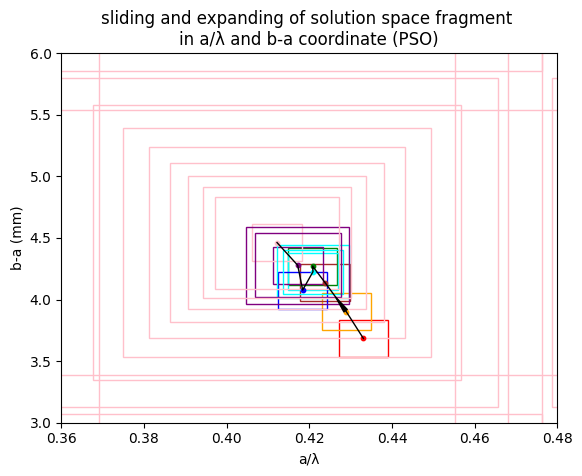

In [34]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

# 创建一个空白图形
fig, ax = plt.subplots()

# 定义矩形的长和宽
width = 0.012
height = 0.3

# 使用内置的颜色映射
colors = plt.cm.tab20

init_num = [0, 5, 17, 23, 29, 39, 47, 55]
#init_num = [47]
# 使用不同的颜色
colors = ['red', 'orange', 'brown','green', 'cyan', 'blue', 'purple','pink']
#colors = ['purple']

for num_item,color in zip(init_num,colors):
        
    # 创建矩形对象
    rect0 = Rectangle((df.loc[num_item, 'aa'] - width/2, df.loc[num_item, 'mm'] - height/2), width, height, fill=False, edgecolor=color)
    # 添加矩形到图形中
    ax.add_patch(rect0)

    if (df.loc[num_item, 'aa'] - width/2) < 0.36:
        # 创建矩形对象
        rect01 = Rectangle((df.loc[num_item, 'aa'] - width/2 + (0.48-0.36), df.loc[num_item, 'mm'] - height/2), width, height, fill=False, edgecolor=color)
        ax.add_patch(rect01)
    if (df.loc[num_item, 'aa'] + width/2) > 0.48:
        # 创建矩形对象
        rect02 = Rectangle((df.loc[num_item, 'aa'] - width/2 - (0.48-0.36), df.loc[num_item, 'mm'] - height/2), width, height, fill=False, edgecolor=color)
        ax.add_patch(rect02)
    if (df.loc[num_item, 'mm'] - height/2) < 3:
        # 创建矩形对象
        rect03 = Rectangle((df.loc[num_item, 'aa'] - width/2, df.loc[num_item, 'mm'] - height/2 + (6 - 3)), width, height, fill=False, edgecolor=color)
        ax.add_patch(rect03)
    if (df.loc[num_item, 'mm'] + height/2) > 6:
        # 创建矩形对象
        rect04 = Rectangle((df.loc[num_item, 'aa'] - width/2, df.loc[num_item, 'mm'] - height/2 - (6-3)), width, height, fill=False, edgecolor=color)
        ax.add_patch(rect04)

init_num = [29, 47]
colors = ['cyan', 'purple']
#init_num=[47]
#colors=['purple']
for num_item,color in zip(init_num,colors):
    for _ in range(2):
        width = width * 1.2
        height = height * 1.2
        # 创建矩形对象
        rect0 = Rectangle((df.loc[num_item, 'aa'] - width/2, df.loc[num_item, 'mm'] - height/2), width, height, fill=False, edgecolor=color)
        # 添加矩形到图形中
        ax.add_patch(rect0)

        if (df.loc[num_item, 'aa'] - width/2) < 0.36:
            # 创建矩形对象
            rect01 = Rectangle((df.loc[num_item, 'aa'] - width/2 + (0.48-0.36), df.loc[num_item, 'mm'] - height/2), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect01)
        if (df.loc[num_item, 'aa'] + width/2) > 0.48:
            # 创建矩形对象
            rect02 = Rectangle((df.loc[num_item, 'aa'] - width/2 - (0.48-0.36), df.loc[num_item, 'mm'] - height/2), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect02)
        if (df.loc[num_item, 'mm'] - height/2) < 3:
            # 创建矩形对象
            rect03 = Rectangle((df.loc[num_item, 'aa'] - width/2, df.loc[num_item, 'mm'] - height/2 + (6 - 3)), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect03)
        if (df.loc[num_item, 'mm'] + height/2) > 6:
            # 创建矩形对象
            rect04 = Rectangle((df.loc[num_item, 'aa'] - width/2, df.loc[num_item, 'mm'] - height/2 - (6-3)), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect04)

init_num=[55]
colors=['pink']
for num_item,color in zip(init_num,colors):
    for _ in range(10):
        width = width * 1.2
        height = height * 1.2
        # 创建矩形对象
        rect0 = Rectangle((df.loc[num_item, 'aa'] - width/2, df.loc[num_item, 'mm'] - height/2), width, height, fill=False, edgecolor=color)
        # 添加矩形到图形中
        ax.add_patch(rect0)

        if (df.loc[num_item, 'aa'] - width/2) < 0.36:
            # 创建矩形对象
            rect01 = Rectangle((df.loc[num_item, 'aa'] - width/2 + (0.48-0.36), df.loc[num_item, 'mm'] - height/2), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect01)
        if (df.loc[num_item, 'aa'] + width/2) > 0.48:
            # 创建矩形对象
            rect02 = Rectangle((df.loc[num_item, 'aa'] - width/2 - (0.48-0.36), df.loc[num_item, 'mm'] - height/2), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect02)
        if (df.loc[num_item, 'mm'] - height/2) < 3:
            # 创建矩形对象
            rect03 = Rectangle((df.loc[num_item, 'aa'] - width/2, df.loc[num_item, 'mm'] - height/2 + (6 - 3)), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect03)
        if (df.loc[num_item, 'mm'] + height/2) > 6:
            # 创建矩形对象
            rect04 = Rectangle((df.loc[num_item, 'aa'] - width/2, df.loc[num_item, 'mm'] - height/2 - (6-3)), width, height, fill=False, edgecolor=color)
            ax.add_patch(rect04)
    
# 散点坐标数据
x = [df.loc[0, 'aa'], df.loc[5, 'aa'], df.loc[17, 'aa'], df.loc[23, 'aa'], df.loc[29, 'aa'], df.loc[39, 'aa'], df.loc[47, 'aa'], df.loc[55, 'aa']]
y = [df.loc[0, 'mm'], df.loc[5, 'mm'], df.loc[17, 'mm'], df.loc[23, 'mm'], df.loc[29, 'mm'], df.loc[39, 'mm'], df.loc[47, 'mm'], df.loc[55, 'mm']]
colors = ['red', 'orange', 'brown','green', 'cyan', 'blue', 'purple','pink']
# 添加散点
plt.scatter(df.loc[0, 'aa'], df.loc[0, 'mm'], color=colors[0], s=10)
# 添加散点
plt.scatter(df.loc[5, 'aa'], df.loc[5, 'mm'], color=colors[1], s=10)
# 添加散点
plt.scatter(df.loc[17, 'aa'], df.loc[17, 'mm'], color=colors[2], s=10)
# 添加散点
plt.scatter(df.loc[23, 'aa'], df.loc[23, 'mm'], color=colors[3], s=10)
# 添加散点
plt.scatter(df.loc[29, 'aa'], df.loc[29, 'mm'], color=colors[4], s=10)
# 添加散点
plt.scatter(df.loc[39, 'aa'], df.loc[39, 'mm'], color=colors[5], s=10)
# 添加散点
plt.scatter(df.loc[47, 'aa'], df.loc[47, 'mm'], color=colors[6], s=10)
# 添加散点
plt.scatter(df.loc[55, 'aa'], df.loc[55, 'mm'], color=colors[7], s=10)

# 绘制连线
plt.plot(x, y, color='black', linestyle='-', linewidth=1, label='Line')

# 添加箭头
plt.annotate('', xy=(df.loc[17, 'aa'], df.loc[17, 'mm']), xytext=(df.loc[5, 'aa'], df.loc[5, 'mm']), arrowprops=dict(facecolor='black', shrink=0.5, width=1, headwidth=3))


# 设置坐标轴标签
plt.xlabel('a/λ')
plt.ylabel('b-a (mm)')

# 添加标题
plt.title('sliding and expanding of solution space fragment \nin a/λ and b-a coordinate (PSO)')

# 设置x轴和y轴的范围
plt.xlim(0.36, 0.48)
plt.ylim(3, 6)

plt.show()

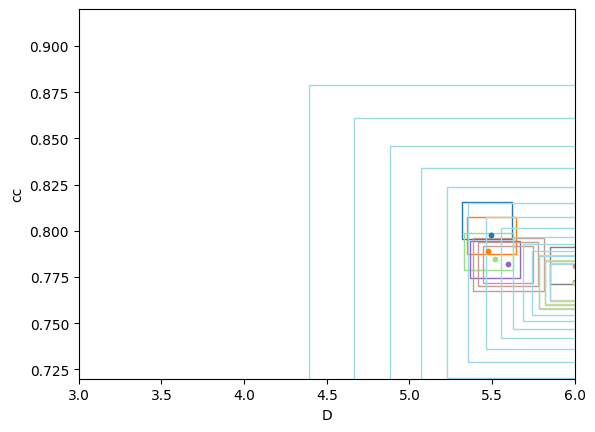

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

# 创建一个空白图形
fig, ax = plt.subplots()

# 定义矩形的长和宽
width = 0.3
height = 0.02

# 使用内置的颜色映射
colors = plt.cm.tab20

# 创建矩形对象
rect0 = Rectangle((df.loc[0, 'D'] - width/2, df.loc[0, 'cc'] - height/2), width, height, fill=False, edgecolor=colors(0))
# 添加矩形到图形中
ax.add_patch(rect0)

# 创建矩形对象
rect1 = Rectangle((df.loc[5, 'D'] - width/2, df.loc[5, 'cc'] - height/2), width, height, fill=False, edgecolor=colors(0.12))
# 添加矩形到图形中
ax.add_patch(rect1)

# 创建矩形对象
rect2 = Rectangle((df.loc[17, 'D'] - width/2, df.loc[17, 'cc'] - height/2), width, height, fill=False, edgecolor=colors(0.25))
# 添加矩形到图形中
ax.add_patch(rect2)

# 创建矩形对象
rect3 = Rectangle((df.loc[23, 'D'] - width/2, df.loc[23, 'cc'] - height/2), width, height, fill=False, edgecolor=colors(0.4))
# 添加矩形到图形中
ax.add_patch(rect3)

# 创建矩形对象
rect4 = Rectangle((df.loc[29, 'D'] - width/2, df.loc[29, 'cc'] - height/2), width, height, fill=False, edgecolor=colors(0.55))
# 添加矩形到图形中
ax.add_patch(rect4)

# 创建矩形对象
rect14 = Rectangle((df.loc[29, 'D'] - width/2*1.2, df.loc[29, 'cc'] - height/2*1.2), width*1.2, height*1.2, fill=False, edgecolor=colors(0.55))
# 添加矩形到图形中
ax.add_patch(rect14)

# 创建矩形对象
rect24 = Rectangle((df.loc[29, 'D'] - width/2*1.2*1.2, df.loc[29, 'cc'] - height/2*1.2*1.2), width*1.2*1.2, height*1.2*1.2, fill=False, edgecolor=colors(0.55))
# 添加矩形到图形中
ax.add_patch(rect24)

# 创建矩形对象
rect5 = Rectangle((df.loc[39, 'D'] - width/2, df.loc[39, 'cc'] - height/2), width, height, fill=False, edgecolor=colors(0.7))
# 添加矩形到图形中
ax.add_patch(rect5)

# 创建矩形对象
rect6 = Rectangle((df.loc[47, 'D'] - width/2, df.loc[47, 'cc'] - height/2), width, height, fill=False, edgecolor=colors(0.85))
# 添加矩形到图形中
ax.add_patch(rect6)
# 创建矩形对象
rect16 = Rectangle((df.loc[47, 'D'] - width/2*1.2, df.loc[47, 'cc'] - height/2*1.2), width*1.2, height*1.2, fill=False, edgecolor=colors(0.85))
# 添加矩形到图形中
ax.add_patch(rect16)

# 创建矩形对象
rect26 = Rectangle((df.loc[47, 'D'] - width/2*1.2*1.2, df.loc[47, 'cc'] - height/2*1.2*1.2), width*1.2*1.2, height*1.2*1.2, fill=False, edgecolor=colors(0.85))
# 添加矩形到图形中
ax.add_patch(rect26)

# 创建矩形对象
rect7 = Rectangle((df.loc[55, 'D'] - width/2, df.loc[55, 'cc'] - height/2), width, height, fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect7)

rect17 = Rectangle((df.loc[55, 'D'] - width/2*1.2, df.loc[55, 'cc'] - height/2*1.2), width*1.2, height*1.2, fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect17)

rect27 = Rectangle((df.loc[55, 'D'] - width/2*1.2*1.2, df.loc[55, 'cc'] - height/2*1.2*1.2), width*1.2*1.2, height*1.2*1.2, fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect27)

rect37 = Rectangle((df.loc[55, 'D'] - width/2*1.2*1.2*1.2, df.loc[55, 'cc'] - height/2*1.2*1.2*1.2), width*1.2*1.2*1.2, height*1.2*1.2*1.2, fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect37)

rect47 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**4), df.loc[55, 'cc'] - height/2*(1.2**4)), width*(1.2**4), height*(1.2**4), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect47)

rect57 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**5), df.loc[55, 'cc'] - height/2*(1.2**5)), width*(1.2**5), height*(1.2**5), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect57)

rect67 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**6), df.loc[55, 'cc'] - height/2*(1.2**6)), width*(1.2**6), height*(1.2**6), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect67)

rect77 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**7), df.loc[55, 'cc'] - height/2*(1.2**7)), width*(1.2**7), height*(1.2**7), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect77)

rect87 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**8), df.loc[55, 'cc'] - height/2*(1.2**8)), width*(1.2**8), height*(1.2**8), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect87)

rect97 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**9), df.loc[55, 'cc'] - height/2*(1.2**9)), width*(1.2**9), height*(1.2**9), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect97)

rect107 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**10), df.loc[55, 'cc'] - height/2*(1.2**10)), width*(1.2**10), height*(1.2**10), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect107)

rect117 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**11), df.loc[55, 'cc'] - height/2*(1.2**11)), width*(1.2**11), height*(1.2**11), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect117)

rect127 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**12), df.loc[55, 'cc'] - height/2*(1.2**12)), width*(1.2**12), height*(1.2**12), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect127)

rect137 = Rectangle((df.loc[55, 'D'] - width/2*(1.2**13), df.loc[55, 'cc'] - height/2*(1.2**13)), width*(1.2**13), height*(1.2**13), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect137)




# 设置坐标轴标签
plt.xlabel('D')
plt.ylabel('cc')

# 设置x轴和y轴的范围
plt.xlim(3, 6)
plt.ylim(0.72, 0.92)

# 添加散点
plt.scatter(df.loc[5, 'D'], df.loc[5, 'cc'], color=colors(0), s=10)
# 添加散点
plt.scatter(df.loc[17, 'D'], df.loc[17, 'cc'], color=colors(0.12), s=10)
# 添加散点
plt.scatter(df.loc[23, 'D'], df.loc[23, 'cc'], color=colors(0.25), s=10)
# 添加散点
plt.scatter(df.loc[29, 'D'], df.loc[29, 'cc'], color=colors(0.4), s=10)
# 添加散点
plt.scatter(df.loc[39, 'D'], df.loc[39, 'cc'], color=colors(0.55), s=10)
# 添加散点
plt.scatter(df.loc[47, 'D'], df.loc[47, 'cc'], color=colors(0.7), s=10)
# 添加散点
plt.scatter(df.loc[55, 'D'], df.loc[55, 'cc'], color=colors(0.85), s=10)


# 显示图形
plt.show()


In [32]:
df.shape

(101, 4)

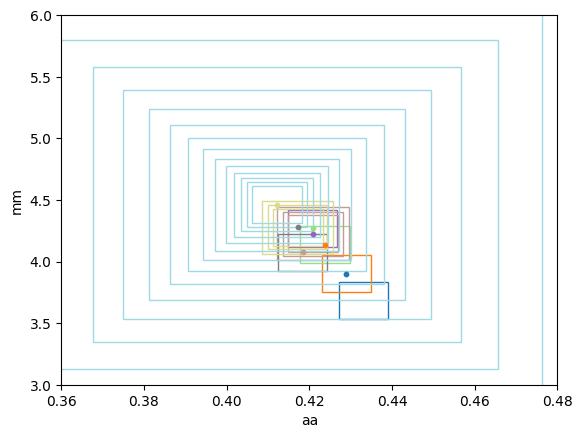

In [33]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

# 创建一个空白图形
fig, ax = plt.subplots()

# 定义矩形的长和宽
width = 0.012
height = 0.3

# 使用内置的颜色映射
colors = plt.cm.tab20

# 创建矩形对象
rect0 = Rectangle((df.loc[0, 'aa'] - width/2, df.loc[0, 'mm'] - height/2), width, height, fill=False, edgecolor=colors(0))
# 添加矩形到图形中
ax.add_patch(rect0)

# 创建矩形对象
rect1 = Rectangle((df.loc[5, 'aa'] - width/2, df.loc[5, 'mm'] - height/2), width, height, fill=False, edgecolor=colors(0.12))
# 添加矩形到图形中
ax.add_patch(rect1)

# 创建矩形对象
rect2 = Rectangle((df.loc[17, 'aa'] - width/2, df.loc[17, 'mm'] - height/2), width, height, fill=False, edgecolor=colors(0.25))
# 添加矩形到图形中
ax.add_patch(rect2)

# 创建矩形对象
rect3 = Rectangle((df.loc[23, 'aa'] - width/2, df.loc[23, 'mm'] - height/2), width, height, fill=False, edgecolor=colors(0.4))
# 添加矩形到图形中
ax.add_patch(rect3)

# 创建矩形对象
rect4 = Rectangle((df.loc[29, 'aa'] - width/2, df.loc[29, 'mm'] - height/2), width, height, fill=False, edgecolor=colors(0.55))
# 添加矩形到图形中
ax.add_patch(rect4)

# 创建矩形对象
rect14 = Rectangle((df.loc[29, 'aa'] - width/2*1.2, df.loc[29, 'mm'] - height/2*1.2), width*1.2, height*1.2, fill=False, edgecolor=colors(0.55))
# 添加矩形到图形中
ax.add_patch(rect14)

# 创建矩形对象
rect24 = Rectangle((df.loc[29, 'aa'] - width/2*1.2*1.2, df.loc[29, 'mm'] - height/2*1.2*1.2), width*1.2*1.2, height*1.2*1.2, fill=False, edgecolor=colors(0.55))
# 添加矩形到图形中
ax.add_patch(rect24)

# 创建矩形对象
rect5 = Rectangle((df.loc[39, 'aa'] - width/2, df.loc[39, 'mm'] - height/2), width, height, fill=False, edgecolor=colors(0.7))
# 添加矩形到图形中
ax.add_patch(rect5)

# 创建矩形对象
rect6 = Rectangle((df.loc[47, 'aa'] - width/2, df.loc[47, 'mm'] - height/2), width, height, fill=False, edgecolor=colors(0.85))
# 添加矩形到图形中
ax.add_patch(rect6)
# 创建矩形对象
rect16 = Rectangle((df.loc[47, 'aa'] - width/2*1.2, df.loc[47, 'mm'] - height/2*1.2), width*1.2, height*1.2, fill=False, edgecolor=colors(0.85))
# 添加矩形到图形中
ax.add_patch(rect16)

# 创建矩形对象
rect26 = Rectangle((df.loc[47, 'aa'] - width/2*1.2*1.2, df.loc[47, 'mm'] - height/2*1.2*1.2), width*1.2*1.2, height*1.2*1.2, fill=False, edgecolor=colors(0.85))
# 添加矩形到图形中
ax.add_patch(rect26)

# 创建矩形对象
rect7 = Rectangle((df.loc[55, 'aa'] - width/2, df.loc[55, 'mm'] - height/2), width, height, fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect7)

rect17 = Rectangle((df.loc[55, 'aa'] - width/2*1.2, df.loc[55, 'mm'] - height/2*1.2), width*1.2, height*1.2, fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect17)

rect27 = Rectangle((df.loc[55, 'aa'] - width/2*1.2*1.2, df.loc[55, 'mm'] - height/2*1.2*1.2), width*1.2*1.2, height*1.2*1.2, fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect27)

rect37 = Rectangle((df.loc[55, 'aa'] - width/2*1.2*1.2*1.2, df.loc[55, 'mm'] - height/2*1.2*1.2*1.2), width*1.2*1.2*1.2, height*1.2*1.2*1.2, fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect37)

rect47 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**4), df.loc[55, 'mm'] - height/2*(1.2**4)), width*(1.2**4), height*(1.2**4), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect47)

rect57 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**5), df.loc[55, 'mm'] - height/2*(1.2**5)), width*(1.2**5), height*(1.2**5), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect57)

rect67 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**6), df.loc[55, 'mm'] - height/2*(1.2**6)), width*(1.2**6), height*(1.2**6), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect67)

rect77 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**7), df.loc[55, 'mm'] - height/2*(1.2**7)), width*(1.2**7), height*(1.2**7), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect77)

rect87 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**8), df.loc[55, 'mm'] - height/2*(1.2**8)), width*(1.2**8), height*(1.2**8), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect87)

rect97 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**9), df.loc[55, 'mm'] - height/2*(1.2**9)), width*(1.2**9), height*(1.2**9), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect97)

rect107 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**10), df.loc[55, 'mm'] - height/2*(1.2**10)), width*(1.2**10), height*(1.2**10), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect107)

rect117 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**11), df.loc[55, 'mm'] - height/2*(1.2**11)), width*(1.2**11), height*(1.2**11), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect117)

rect127 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**12), df.loc[55, 'mm'] - height/2*(1.2**12)), width*(1.2**12), height*(1.2**12), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect127)

rect137 = Rectangle((df.loc[55, 'aa'] - width/2*(1.2**13), df.loc[55, 'mm'] - height/2*(1.2**13)), width*(1.2**13), height*(1.2**13), fill=False, edgecolor=colors(0.95))
# 添加矩形到图形中
ax.add_patch(rect137)




# 设置坐标轴标签
plt.xlabel('aa')
plt.ylabel('mm')

# 设置x轴和y轴的范围
plt.xlim(0.36, 0.48)
plt.ylim(3, 6)

# 添加散点
plt.scatter(df.loc[5, 'aa'], df.loc[5, 'mm'], color=colors(0), s=10)
# 添加散点
plt.scatter(df.loc[17, 'aa'], df.loc[17, 'mm'], color=colors(0.12), s=10)
# 添加散点
plt.scatter(df.loc[23, 'aa'], df.loc[23, 'mm'], color=colors(0.25), s=10)
# 添加散点
plt.scatter(df.loc[29, 'aa'], df.loc[29, 'mm'], color=colors(0.4), s=10)
# 添加散点
plt.scatter(df.loc[39, 'aa'], df.loc[39, 'mm'], color=colors(0.55), s=10)
# 添加散点
plt.scatter(df.loc[47, 'aa'], df.loc[47, 'mm'], color=colors(0.7), s=10)
# 添加散点
plt.scatter(df.loc[55, 'aa'], df.loc[55, 'mm'], color=colors(0.85), s=10)

# 显示图形
plt.show()
